# 0. Dependências

In [ ]:
!pip install cv2

In [ ]:
!pip install numpy

# 1. Modelo de visualização

In [ ]:
import cv2

In [ ]:
import numpy as np

In [ ]:
# Video Web Camera
cap = cv2.VideoCapture('video.mp4')
while True:
    ret,frame= cap.read()
    cv2.imshow('Video Original',frame)
    if cv2.waitKey(1) == 13:
        break
cv2.destroyAllWindows()
cap.release()

# 2. Detectação

In [ ]:
# Video Web Camera
cap = cv2.VideoCapture('video.mp4')

# Inicializando Substração
algo= cv2.bgsegm.createBackgroundSubtractorMOG()

while True:
    ret,frame= cap.read()
    grey = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(grey,(3,3),5)

# Aplicando em cada quadro 
    img_sub =algo.apply(blur)
    dilat = cv2.dilate(img_sub,np.ones((5,5)))
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    dilatada = cv2.morphologyEx(dilat, cv2.MORPH_CLOSE, kernel)
    dilatada = cv2.morphologyEx(dilatada, cv2.MORPH_CLOSE, kernel)
    counterSahpe = cv2.findContours(dilatada, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    cv2.imshow('Detectar',dilatada)
    
    #cv2.imshow('Video Original',frame)
    if cv2.waitKey(1) == 13:
        break
cv2.destroyAllWindows()
cap.release()

# 3. Detectação + Contagem

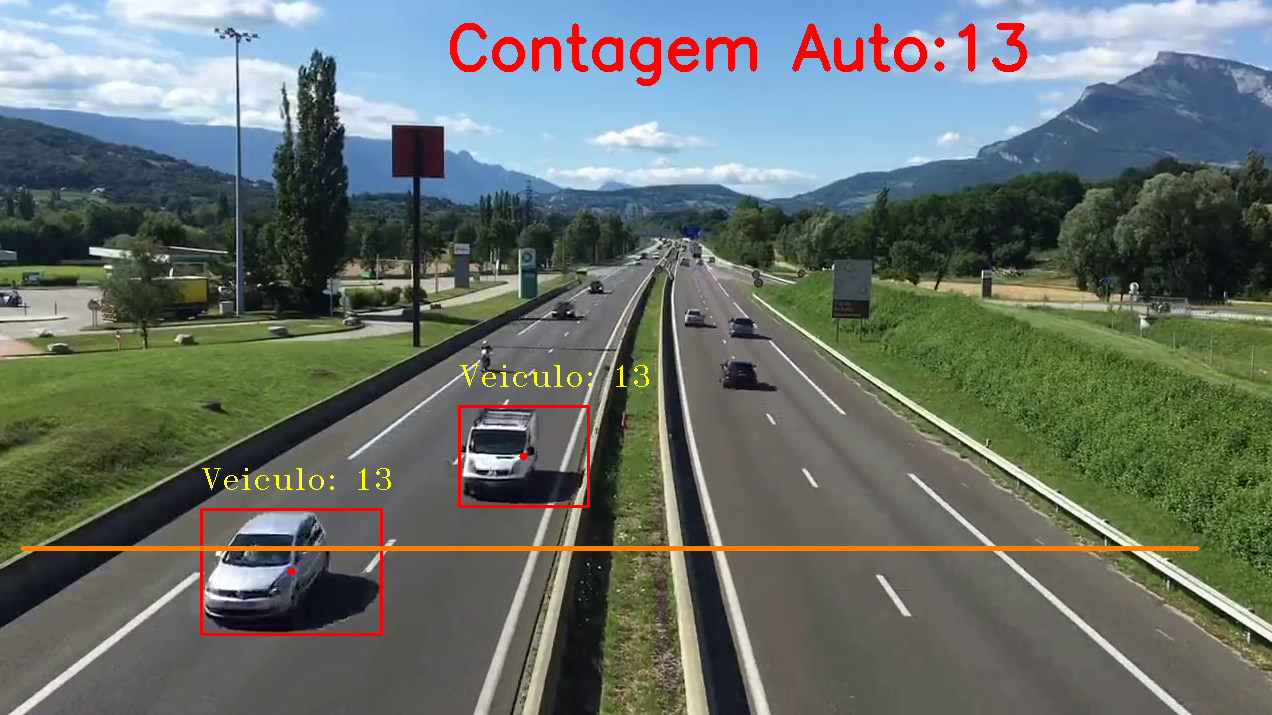

In [ ]:
# Video Web Camera
cap = cv2.VideoCapture('video.mp4')

min_width_react=80 #largura principal
min_hieght_react=80 #altura principal

count_line_postion= 550
# Inicializando Substração
algo= cv2.bgsegm.createBackgroundSubtractorMOG()

def center_handle(x,y,w,h):
    x1=int(w/2)
    y1=int(h/2)
    cx= x+x1
    cy= y+y1
    return cx,cy

detect= []
offset=6 # taxa de erro permitida entre pixel
counter=0

while True:
    ret,frame= cap.read()
    grey = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(grey,(3,3),5)

# Aplicando em cada quadro 
    img_sub =algo.apply(blur)
    dilat = cv2.dilate(img_sub,np.ones((5,5)))
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    dilatada = cv2.morphologyEx(dilat, cv2.MORPH_CLOSE, kernel)
    dilatada = cv2.morphologyEx(dilatada, cv2.MORPH_CLOSE, kernel)
    counterSahpe,h = cv2.findContours(dilatada, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    cv2.line(frame,(25,count_line_postion),(1200,count_line_postion),(255,127,0),3)
    
    for (i,c) in enumerate(counterSahpe):
        (x,y,w,h) = cv2.boundingRect(c)
        validate_counter = (w>= min_width_react) and (h>= min_hieght_react)
        if not validate_counter:
            continue
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
        cv2.putText(frame,"Veiculo: "+str(counter), (x,y-20), cv2.FONT_HERSHEY_TRIPLEX, 1, (0,255,255))
        
        center= center_handle(x,y,w,h)
        detect.append(center)
        cv2.circle(frame,center,4, (0,0,255),-1)
        
        for (x,y) in detect:
            if y<(count_line_postion+offset) and y>(count_line_postion-offset):
                counter+=1
            cv2.line(frame,(25,count_line_postion),(1200,count_line_postion),(0,127,255),3)
            detect.remove((x,y))
            
            print("Contagem:"+str(counter))
            
    cv2.putText(frame,"Contagem Auto:"+str(counter),(450,70),cv2.FONT_HERSHEY_SIMPLEX,2,(0,0,255),5)
            
    #cv2.imshow('Detectar',dilatada)
    cv2.imshow('Video Original',frame)
    if cv2.waitKey(1) == 13:
        break
cv2.destroyAllWindows()
cap.release()